# Labor 2

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython.display as ipd

import scipy.io.wavfile as wav
import librosa

#### a. 1. Plotten und hören Sie sich den Grundton y(t) ihrer Stimmbänder (f-male=130Hz,f-female=200Hz;x = 1.0; t = 2s) an, und berechnen Sie anschließend die mittlere Leistung des Schallsignals in der Zeitdomäne.

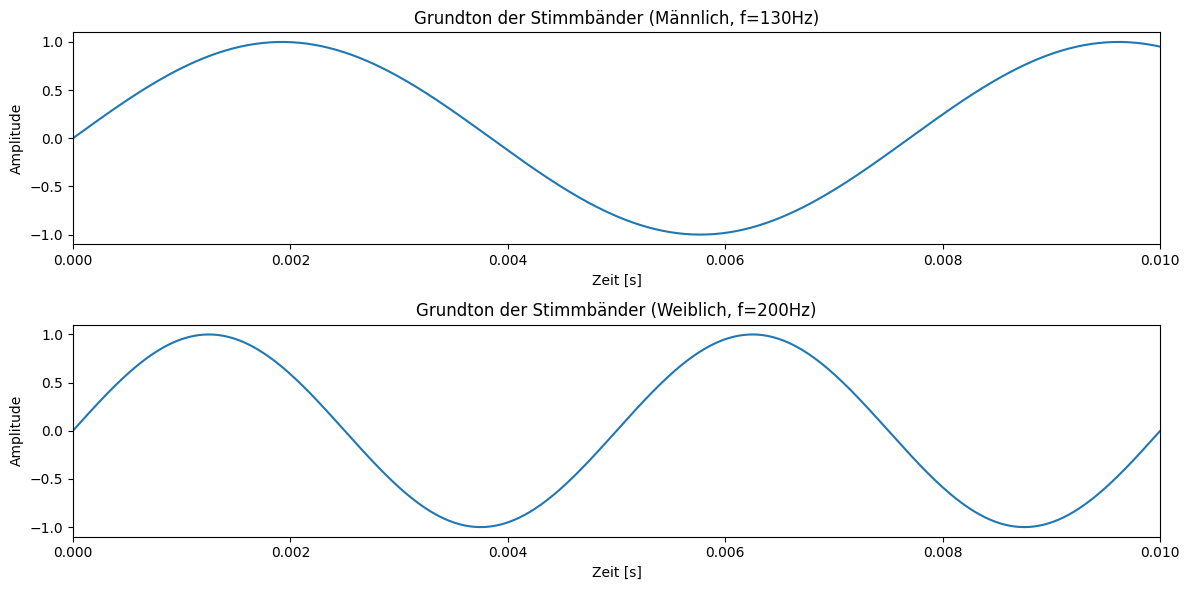

Männlicher Grundton (130 Hz):


Weiblicher Grundton (200 Hz):


In [35]:

def grundton(t, f):
    return np.sin(2 * np.pi * f * t)

# Parameter
amplitude = 1.0  # Amplitude
duration = 2.0  # Dauer in Sekunden
sampling_rate = 44100  # Abtastrate in Hz
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Zeitvektor
f_male = 130  # Grundtonfrequenz für männliche Stimmen
f_female = 200  # Grundtonfrequenz für weibliche Stimmen

# Grundton für männliche Stimme
y_male = amplitude * grundton(t, f_male)

# Grundton für weibliche Stimme
y_female = amplitude * grundton(t, f_female)

# Plotten der Signale
plt.figure(figsize=(12, 6))

# Plot für männliche Stimme
plt.subplot(2, 1, 1)
plt.plot(t, y_male)
plt.xlim(0, 0.01)
plt.title('Grundton der Stimmbänder (Männlich, f=130Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

# Plot für weibliche Stimme
plt.subplot(2, 1, 2)
plt.plot(t, y_female)
plt.xlim(0, 0.01)
plt.title('Grundton der Stimmbänder (Weiblich, f=200Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Speichere die Töne als WAV-Dateien
male_file = "grundton_male.wav"
female_file = "grundton_female.wav"
write(male_file, sampling_rate, y_male.astype(np.float32))
write(female_file, sampling_rate, y_female.astype(np.float32))

# Audioausgabe zum Anhören
print("Männlicher Grundton (130 Hz):")
ipd.display(ipd.Audio(y_male, rate=sampling_rate))

print("Weiblicher Grundton (200 Hz):")
ipd.display(ipd.Audio(y_female, rate=sampling_rate))

In [36]:

# Mittlere Leistung berechnen
power_male_time = 1/2.0 * np.mean(y_male**2) 
power_female_time = 1/2.0 * np.mean(y_female**2)

print("Mittlere Leistung des männlichen Schallsignals:", power_male_time)
print("Mittlere Leistung des weiblichen Schallsignals:", power_female_time)


Mittlere Leistung des männlichen Schallsignals: 0.25
Mittlere Leistung des weiblichen Schallsignals: 0.24999999999999997


##### Bestimmen Sie dann das Spektrum Y(f) und plotten Sie den Betrag |Y(f)|  und das Betragsquadrat |Y(f)|^2 . 

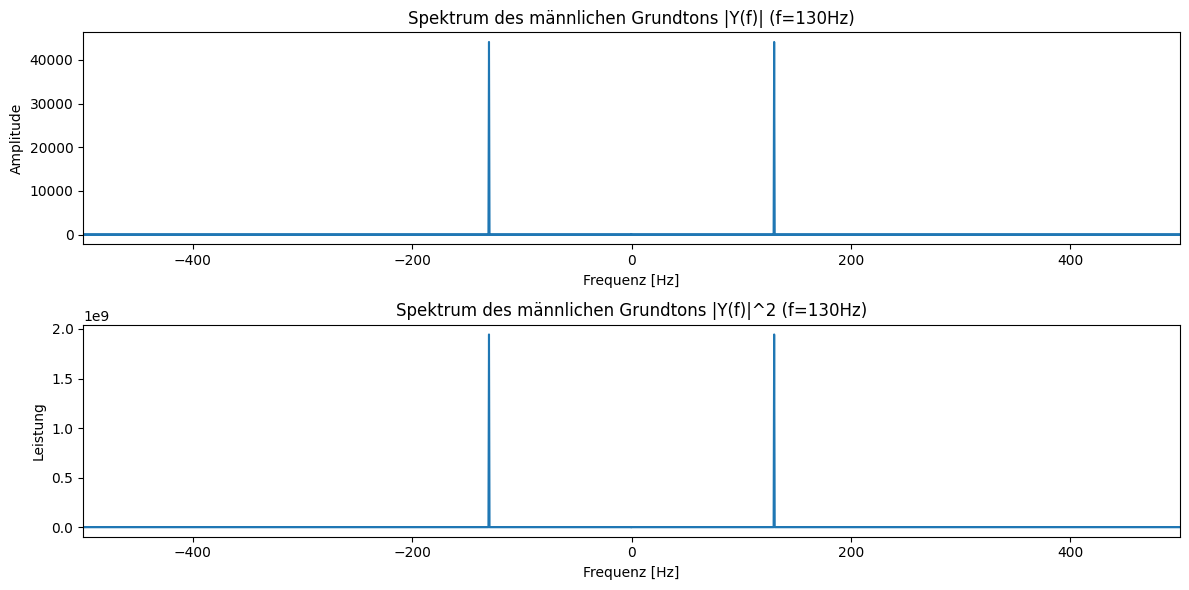

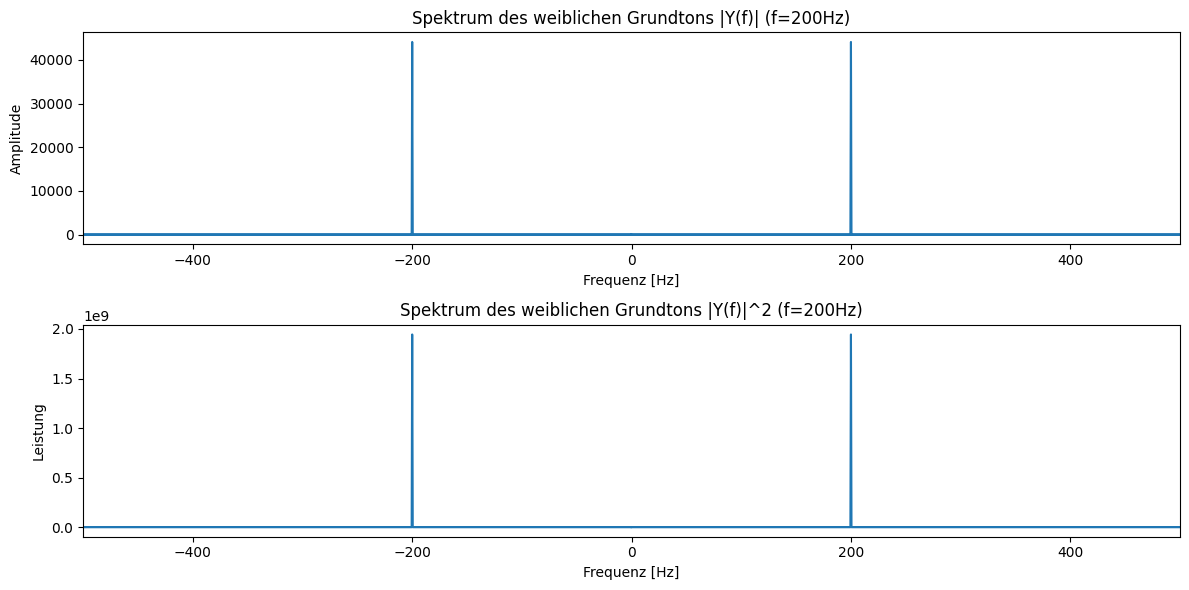

In [37]:

# Berechnung des Spektrums Y(f)
def calculate_spectrum(signal, sampling_rate):
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1 / sampling_rate)
    return spectrum, freq

# Spektrum für männlichen Grundton
spectrum_male, freq_male = calculate_spectrum(y_male, sampling_rate)

# Spektrum für weiblichen Grundton
spectrum_female, freq_female = calculate_spectrum(y_female, sampling_rate)


# Plotten des Spektrums |Y(f)| und |Y(f)|^2 für männliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_male, np.abs(spectrum_male))
plt.xlim(-500, 500)
plt.title('Spektrum des männlichen Grundtons |Y(f)| (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_male, np.abs(spectrum_male)**2)
plt.xlim(-500, 500)
plt.title('Spektrum des männlichen Grundtons |Y(f)|^2 (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

# Plotten des Spektrums |Y(f)| und |Y(f)|^2 für weibliche Stimme
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq_female, np.abs(spectrum_female))
plt.xlim(-500, 500)
plt.title('Spektrum des weiblichen Grundtons |Y(f)| (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_female, np.abs(spectrum_female)**2)
plt.xlim(-500, 500)
plt.title('Spektrum des weiblichen Grundtons |Y(f)|^2 (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')

plt.tight_layout()
plt.show()

##### Erklärung der Diagramme Stimmen die Leistungswerte im Zeit- und Frequenzbereich überein? 

##### Plotten Sie zusätzlich den Real- und Imaginärteil und das Phasen-spektrum.

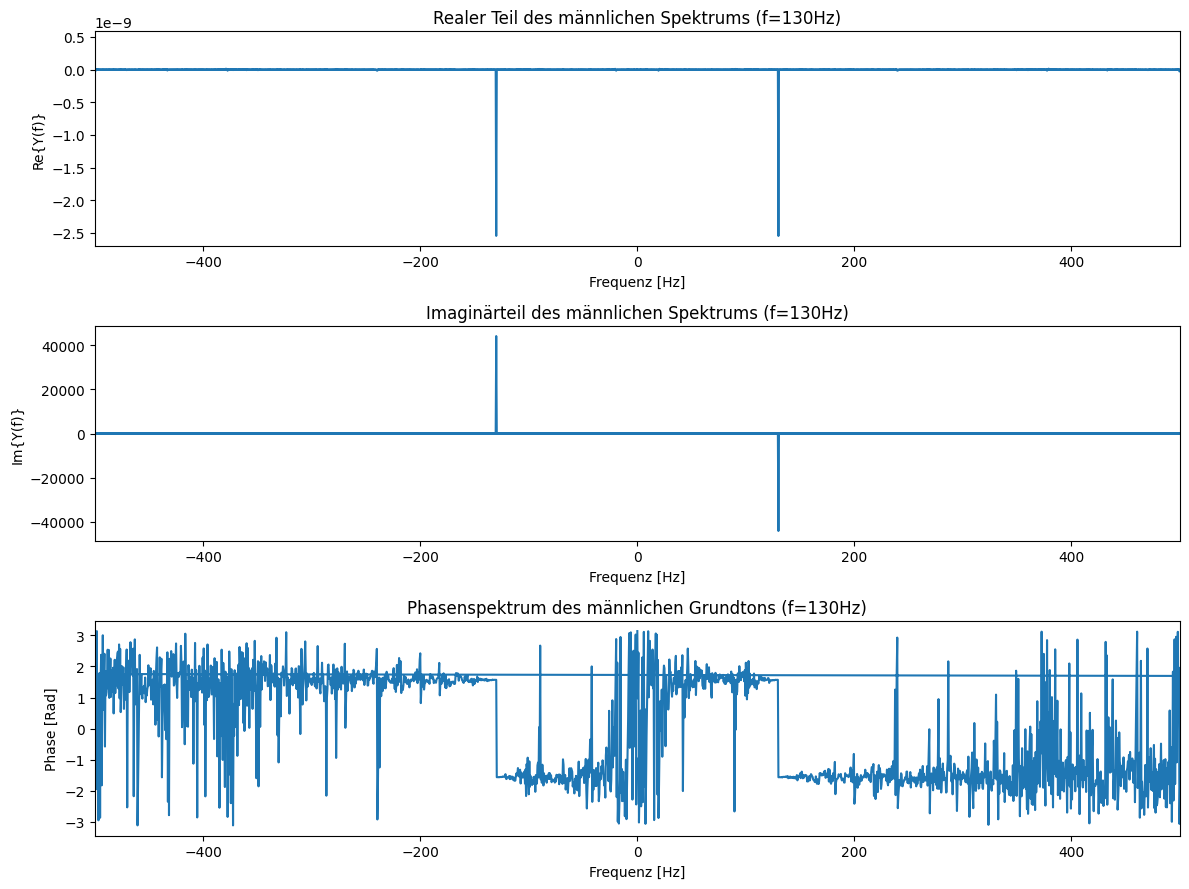

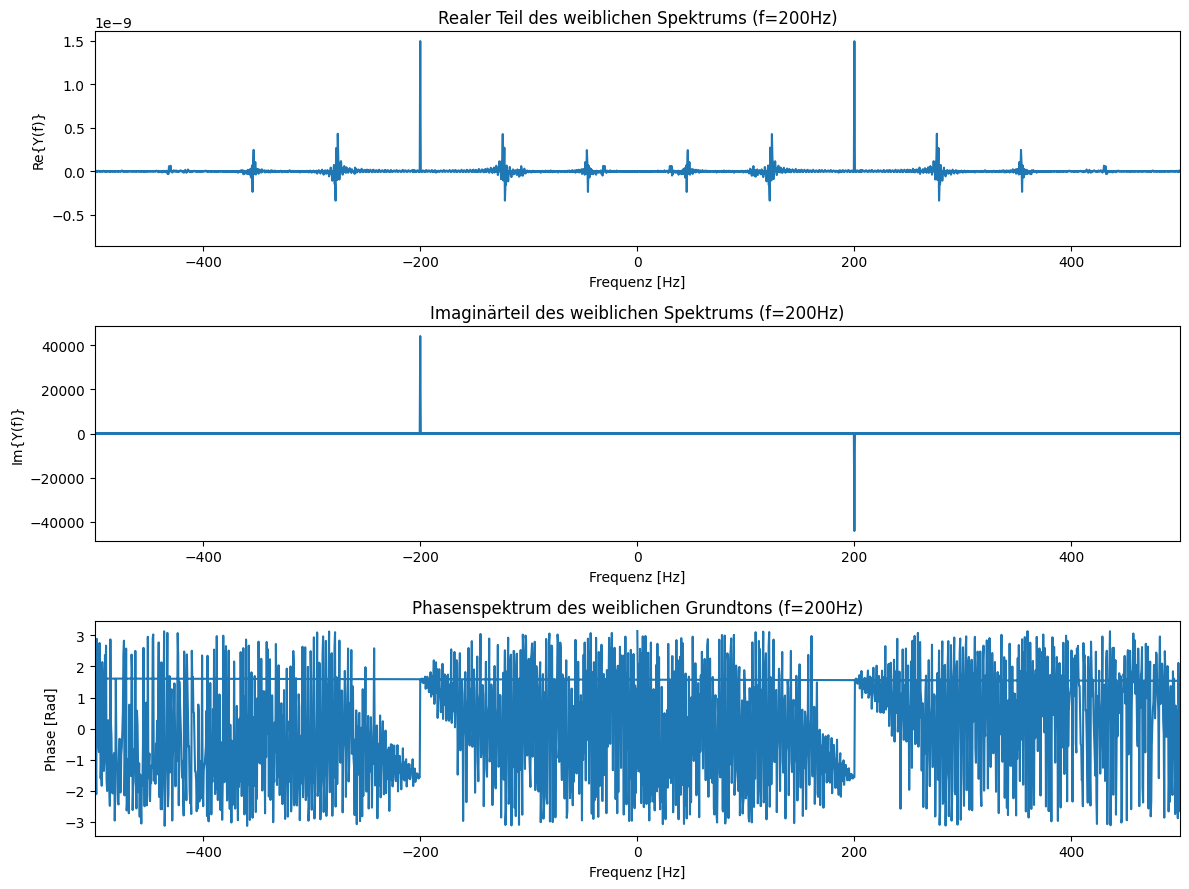

In [38]:

# Plotten des Real- und Imaginärteils sowie des Phasenspektrums für männliche Stimme
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(freq_male, spectrum_male.real)
plt.xlim(-500, 500)
plt.title('Realer Teil des männlichen Spektrums (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Re{Y(f)}')

plt.subplot(3, 1, 2)
plt.plot(freq_male, spectrum_male.imag)
plt.xlim(-500, 500)
plt.title('Imaginärteil des männlichen Spektrums (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Im{Y(f)}')

plt.subplot(3, 1, 3)
plt.plot(freq_male, np.angle(spectrum_male))
plt.xlim(-500, 500)
plt.title('Phasenspektrum des männlichen Grundtons (f=130Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')

plt.tight_layout()
plt.show()

# Plotten des Real- und Imaginärteils sowie des Phasenspektrums für weibliche Stimme
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(freq_female, spectrum_female.real)
plt.xlim(-500, 500)
plt.title('Realer Teil des weiblichen Spektrums (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Re{Y(f)}')

plt.subplot(3, 1, 2)
plt.plot(freq_female, spectrum_female.imag)
plt.xlim(-500, 500)
plt.title('Imaginärteil des weiblichen Spektrums (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Im{Y(f)}')

plt.subplot(3, 1, 3)
plt.plot(freq_female, np.angle(spectrum_female))
plt.xlim(-500, 500)
plt.title('Phasenspektrum des weiblichen Grundtons (f=200Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')

plt.tight_layout()
plt.show()


#### b. Verkürzen Sie nun die Länge des Signals (1 Periode, ½ Periode, ¼ Periode, …) und beobachten und erklären Sie das Verhalten des Spektrums.

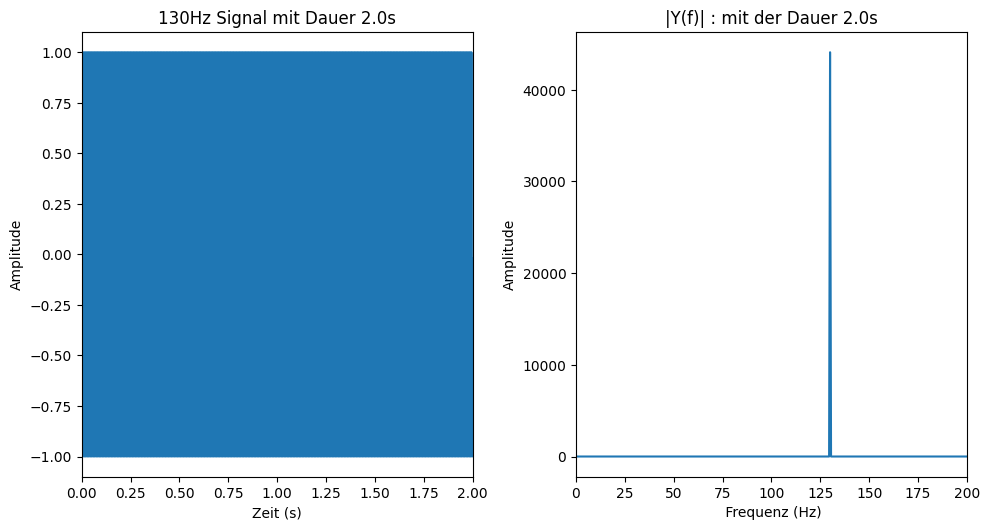

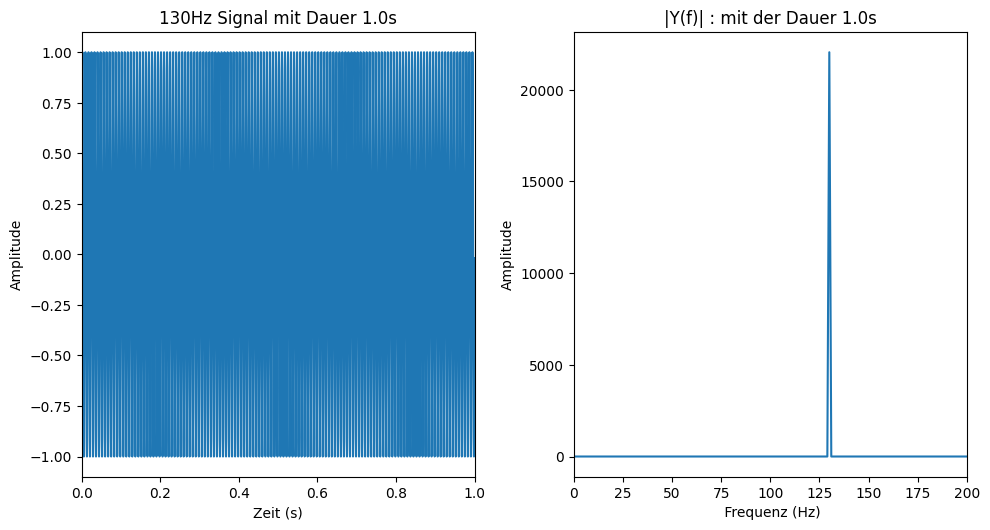

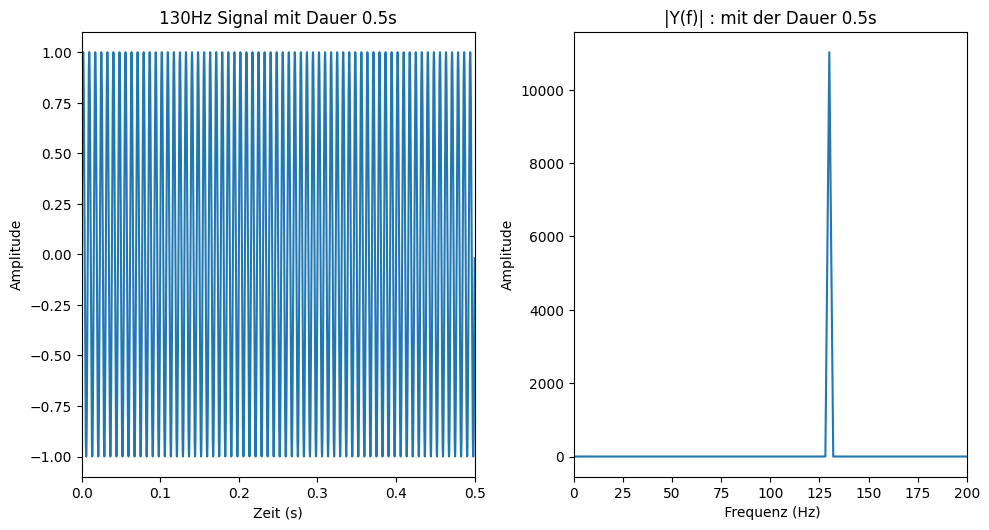

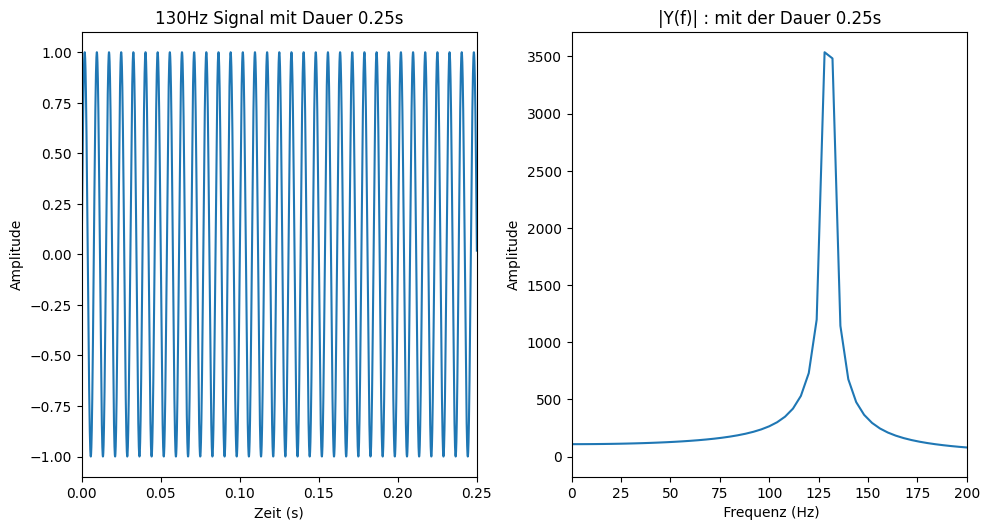

In [39]:
td = 2.0 # Zeitdauer 
f0 = 130 # Frequenz in Hz 
sampling_rate = 44100 #Abtastrate 

while td >= 0.25:
    anzahl_samples = int(sampling_rate * td)
    t = np.linspace(0, td, anzahl_samples, endpoint=False)
    shortened_signal = np.sin(2 * np.pi * f0 * t)
    
    # Fourder-Transformation und Frequenzen berechnen
    spectrum_shortened_signal = np.abs(np.fft.fft(shortened_signal))
    frequenzen = np.fft.fftfreq(len(shortened_signal), 1.0/sampling_rate)
    
    # Plotten des Signals und des Spektrums
    plt. figure(figsize=(10, 10))
    plt. subplot(2, 2, 1)
    plt. plot(t, shortened_signal) 
    plt. xlim(0, td) 
    plt.xlabel('Zeit (s)') 
    plt. ylabel('Amplitude') 
    plt. title(f'130Hz Signal mit Dauer {td}s')

    # Frequenzbereich
    plt. subplot(2, 2, 2)
    plt. plot(frequenzen[: len(frequenzen)//2], spectrum_shortened_signal[: len(spectrum_shortened_signal)//2]) 
    plt. title(f'|Y(f)| : mit der Dauer {td}s') 
    plt. xlabel(' Frequenz (Hz)') 
    plt. ylabel( 'Amplitude') 
    plt. xlim(0, 200) 
    plt.tight_layout() 
    plt. show()
    
    td /= 2 

#### c. Analysieren Sie die von Ihnen in Labor 1 erstellte Sprachbotschaft "Dies ist eine Suchmaschine". Laden Sie das Signal und plotten Sie den Signalverlauf, das zugehörige Leistungsspektrum in [db] und die Phase. Interpretieren Sie die Diagramme.

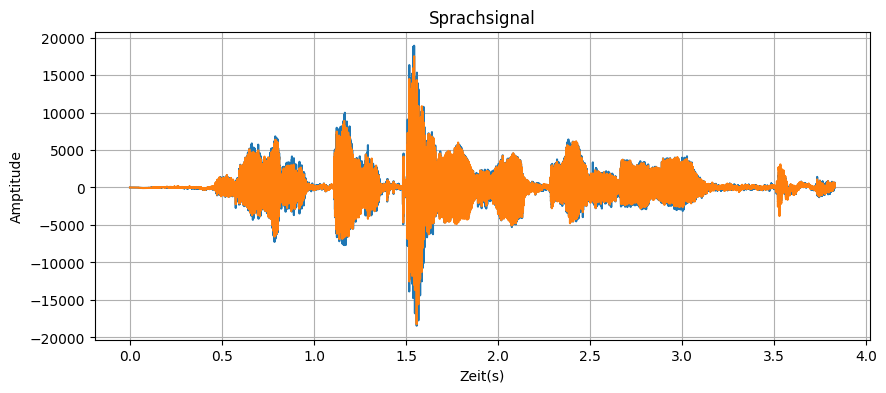

In [40]:
# Pfad zur vorhandenen Audiodatei
audio_path = 'Aufzeichnung.wav'

rate, signal = wav.read(audio_path)
time = np.arange(0, len(signal)) / rate 

plt.figure(figsize=(10,4))
plt.plot(time,signal)
plt.xlabel("Zeit(s)")
plt.ylabel("Amptitude")
plt.title("Sprachsignal")
plt.grid(True)
plt.show()


C:\Users\sinac\AppData\Local\Temp\ipykernel_27960\2894976510.py:8: RuntimeWarning: divide by zero encountered in log10
  leistungsspektrumDB = 10 * np.log10(np.abs(spectrum_signal)**2)


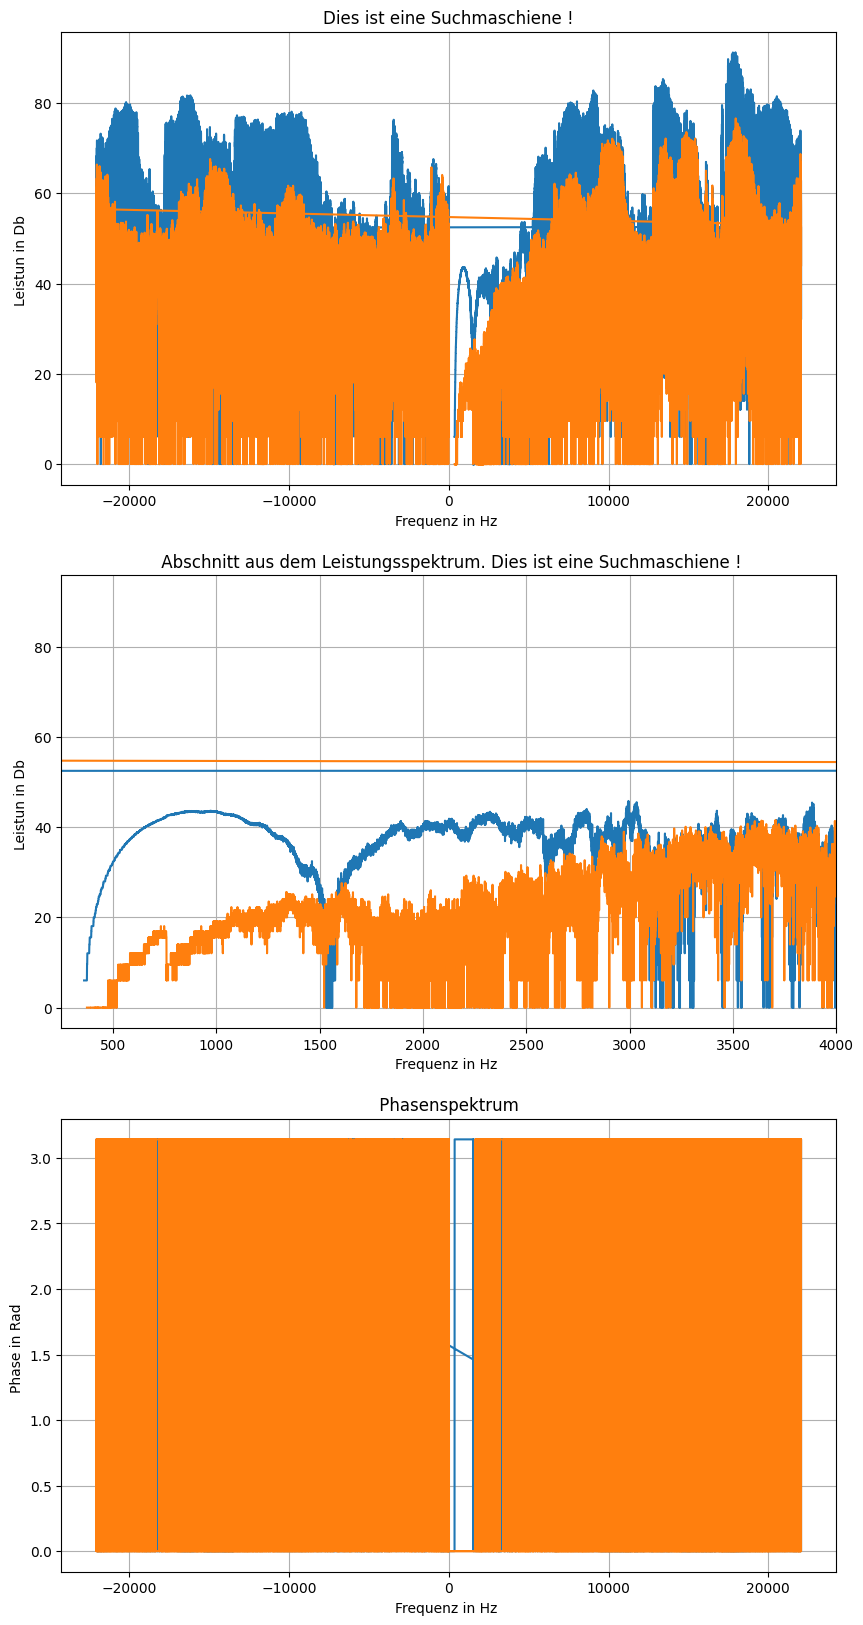

In [49]:
from scipy.io import wavfile

sempling_rate , signal = wavfile.read(audio_path)

spectrum_signal = np.fft.fft(signal)
frequenz = np.fft.fftfreq(len(signal), 1/ sampling_rate)

leistungsspektrumDB = 10 * np.log10(np.abs(spectrum_signal)**2) 
phase_signal = np.angle(spectrum_signal) # Phase 

plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
plt.plot (frequenz, leistungsspektrumDB)
plt.grid(True)
plt.xlabel("Frequenz in Hz ")
plt.ylabel("Leistun in Db ")
plt.title("Dies ist eine Suchmaschiene !")

plt.subplot(3,1,2)
plt.plot (frequenz, leistungsspektrumDB)
plt.xlim(250,4000)
plt.grid(True)
plt.xlabel("Frequenz in Hz ")
plt.ylabel("Leistun in Db ")
plt.title(" Abschnitt aus dem Leistungsspektrum. Dies ist eine Suchmaschiene !")

plt.subplot(3,1,3)
plt.plot (frequenz, phase_signal)
plt.grid(True)
plt.xlabel("Frequenz in Hz ")
plt.ylabel("Phase in Rad ")
plt.title(" Phasenspektrum ")

plt.show()

#### d. Schneiden Sie anschließend mittels eines Audioprogrammes die beiden Wörter "Dies ist" und das Wort "Dies" aus ihrem Sprachsignal aus und speichern diese in einer separaten Audio-Datei. Suchen Sie sich in öffentlich verfügbaren Sprachkonserven Audiodateien für den Vokal "i" und den Konsonanten "s". Berechnen Sie anschließend die zugehörigen Leistungsspektren und vergleichen Sie diese mit dem Leistungsspektrum der gesamten Sprachnachricht. Erklären Sie ihre Beobachtungen. Plotten Sie den jeweiligen Signalverlauf inklusive dem quadratischen Mittel (rms:root mean square) der Amplitude des Signals. Was beobachten Sie?

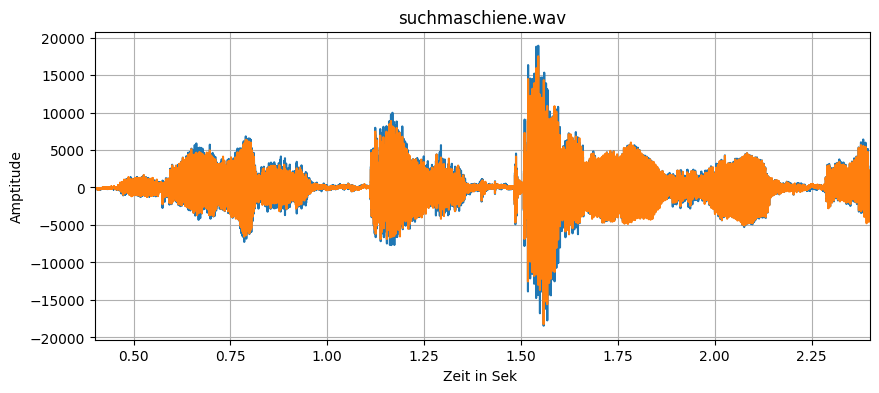

RMS: 42.72683596952772


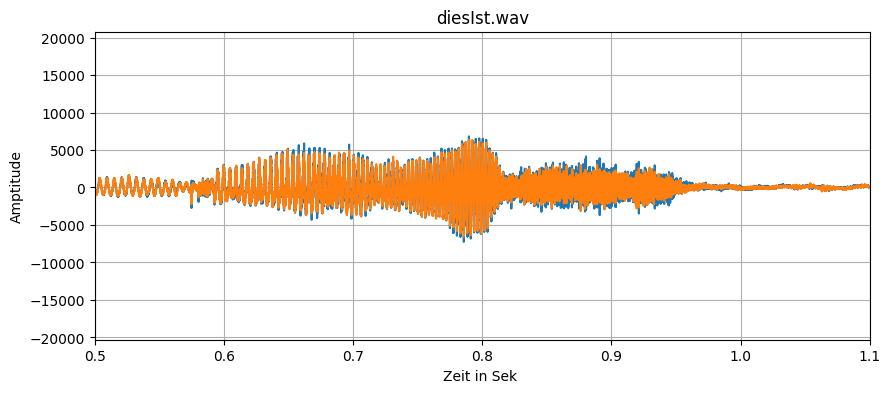

RMS: 42.72683596952772


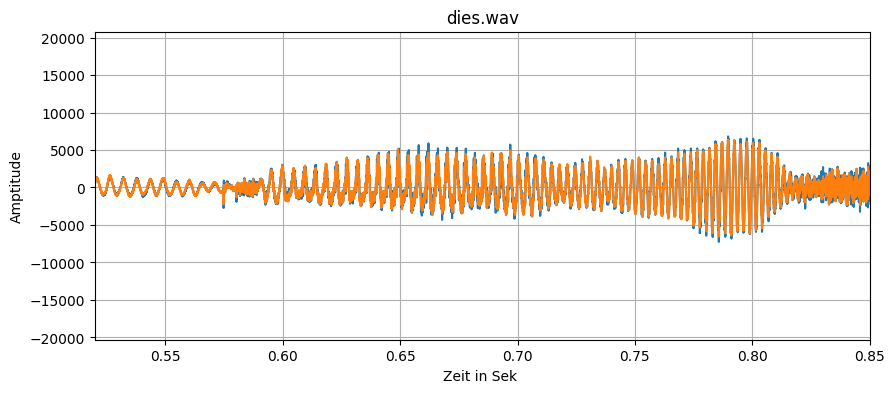

RMS: 42.72683596952772


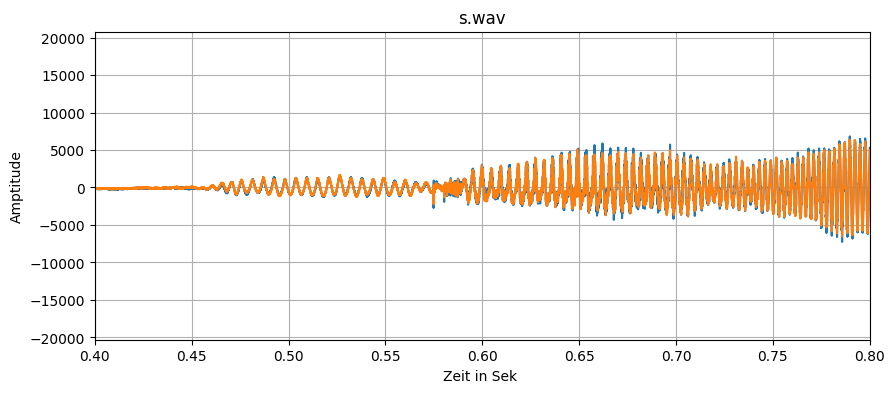

RMS: 42.72683596952772


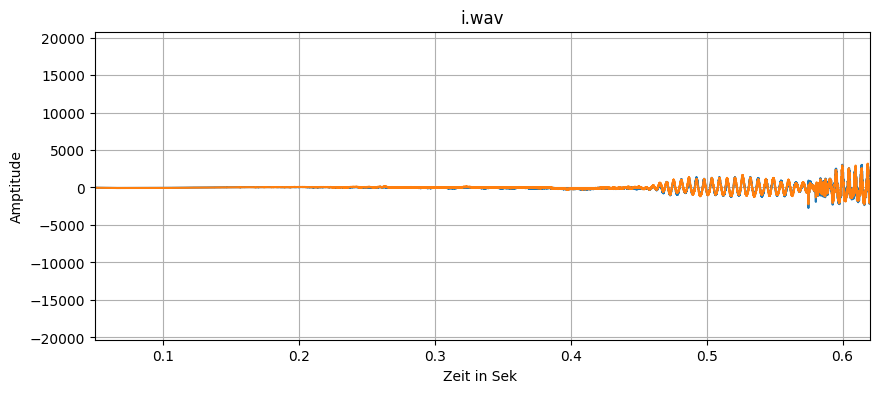

RMS: 42.72683596952772


In [51]:
audio_file = ["suchmaschiene.wav" , "diesIst.wav" , "dies.wav" , "s.wav", "i.wav" ]
audio_time = [0.4, 2.4, 0.5, 1.1, 0.52, 0.85, 0.4, 0.8, 0.05, 0.62]

i = 0 
k = 1

for audio in audio_file : 
    rate , signal = wavfile.read(audio_path)
    time = np.arange(0,len(signal)) / rate 
    rms = np.sqrt(np.mean(np.square (signal)))
    
    plt.figure(figsize=(10,4))
    plt.plot ( time, signal) 
    plt.xlabel("Zeit in Sek ")
    plt.ylabel("Amptitude")
    plt.title(audio)
    plt.xlim(audio_time[i], audio_time[k])
    plt.grid(True)
    plt.show()
    i += 2 
    k += 2
    print (f"RMS: {rms}") 

#### e. Berechnen Sie die Faltung zwischen einer Sinusfunktion (𝑓= 1𝐻𝑧,𝑥 = 1) und der Impulsantwort e / im Bereich t ∈ [0,4π]. Interpretieren Sie das Ergebnis.

In [79]:

# Parameter
f0 = 1 
tMax = 4 * 3.14159
dt = 0.01 

# Zeitvektor
t = np.arange(0, tMax, dt)

# Signal x(t)
x = np.sin(2 * 3 * f0 * t)

# Impulsantwort h(t)
h = np.exp(-t / 2)

# Faltung y(t) = x(t) * h(t)
y = np.convolve(x, h, mode='full') * dt

# Zeitvektor für gefaltetes Signal
tConv = np.arange(0, tMax + tMax, dt)

plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(t,x, lable='x(t) = sin(2PIt)')
plt.title('sinusfunktion')
plt.xlabel('Zeit in sek ')
plt.ylabel('Amptitude')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot( t,h, lable='h(t) = e^(-t/2)', color= 'orange')
plt.title('Impulsantwort')
plt.xlabel('Zeit in sek ')
plt.ylabel('Amptitude')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot( tConv ,y , lable='y(t) = x(t)* h(t)', color= 'green')
plt.title('Faltung')
plt.xlabel('Zeit in sek ')
plt.ylabel('Amptitude')
plt.grid(True)

plt.tight_layout()
plt.show()

TypeError: 'tuple' object is not callable